In [1]:
import ROOT
import yoda
from array import array

Welcome to JupyROOT 6.30/04


In [2]:
root_file = 'out.root'
rivetfile = ROOT.TFile.Open(root_file)

Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3001] Required argument not present


In [3]:
folder=rivetfile.GetDirectory("CMS_1601_PAS_SMP_19_005")

In [5]:
%jsroot
rivet_hist=folder.Get("d01-x01-y01")
canvas = ROOT.TCanvas("canvas", "Comparison of Histograms", 800, 600)
rivet_hist.Draw("E")
#hist.Draw("ESAMES")

#testHist.Draw("ESAMES")
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


In [ ]:
rivet_hist.Scale(1/rivet_hist.Integral())

In [23]:
from ctypes import *
def graph2hist(graph, hist):
    xaxis = hist.GetXaxis().GetXbins();
    newHist = ROOT.TH1D(hist.GetName()+"_copy","",hist.GetNbinsX(), xaxis.GetArray())

    for i in range(graph.GetN()):
        print ("point ", i+1)
        x = c_double()
        y = c_double()
        graph.GetPoint(i,x,y)
        print (x ,"\t", y)
        newHist.SetBinContent(i+1,y)
    return newHist

data_file = "CMS_1601_PAS_SMP_19_005.root"
dataFile = ROOT.TFile.Open(data_file,"READ")
reffolder = dataFile.GetDirectory("REF")
data_hist=reffolder.Get("CMS_1601_PAS_SMP_19_005/d01-x01-y01")
newHist = graph2hist(data_hist,rivet_hist)
newHist.Scale(1./newHist.Integral())
newHist.SetLineColor(3)
newHist.GetYaxis().SetRangeUser(-0.5,1)
rivet_hist.Scale(1./rivet_hist.Integral())
print(rivet_hist.Integral())
root_file2 = 'TotalSig_2016pre.root'
file = ROOT.TFile.Open(root_file2)
# file.ls()
hist = file.Get("pt")
hist.SetLineColor(2)
testfile = "test.root"
File = ROOT.TFile.Open(testfile,"READ")
test_hist=File.Get("REF/CMS_1601_PAS_SMP_19_005/d01-x01-y01")
testHist = graph2hist(test_hist,rivet_hist)
testHist.SetLineColor(4)
testHist.SetLineStyle(2)


point  1
c_double(225.0) 	 c_double(62.486698150634766)
point  2
c_double(300.0) 	 c_double(32.196441650390625)
point  3
c_double(525.0) 	 c_double(12.062800407409668)
0.9999999999999999
point  1
c_double(225.0) 	 c_double(0.4419001042842865)
point  2
c_double(300.0) 	 c_double(0.37057238817214966)
point  3
c_double(525.0) 	 c_double(0.18752749264240265)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


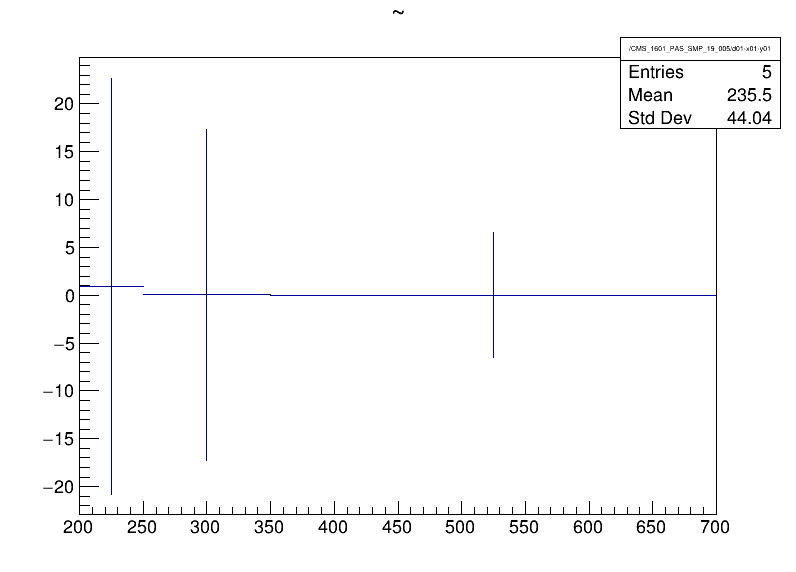

In [24]:
canvas = ROOT.TCanvas("canvas", "Comparison of Histograms", 800, 600)
rivet_hist.Draw("E")
#hist.Draw("ESAMES")

#testHist.Draw("ESAMES")
canvas.Draw()

In [47]:
%jsroot

rivet_hist.SetLineColor(ROOT.kRed)   
rivet_hist.SetLineWidth(1)           
              

data_hist.SetLineColor(ROOT.kBlue)   
data_hist.SetLineWidth(2)           
data_hist.Draw("E")     
rivet_hist.SetLineStyle(10)
rivet_hist.Draw("E SAME")

legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(rivet_hist, "Rivet Histogram", "l")
legend.AddEntry(data_hist, "Data Histogram", "l")
legend.Draw()


# canvas.Update()
canvas.Draw()

In [21]:
root_file = 'TotalSig_2016pre.root'
file = ROOT.TFile.Open(root_file)
file.ls()
hist = file.Get("pt")

TNetXNGFile**		root://eoshome-i03.cern.ch//eos/user/m/mkaramsi/SWAN_projects/splite_rootfile/TotalSig_2016pre.root	
 TNetXNGFile*		root://eoshome-i03.cern.ch//eos/user/m/mkaramsi/SWAN_projects/splite_rootfile/TotalSig_2016pre.root	
  KEY: TH1D	mjj;1	mjj
  KEY: TH1D	pt;1	PT
  KEY: TH1D	delta_phi_jj;1	deltaphi


In [22]:
canvas.cd()

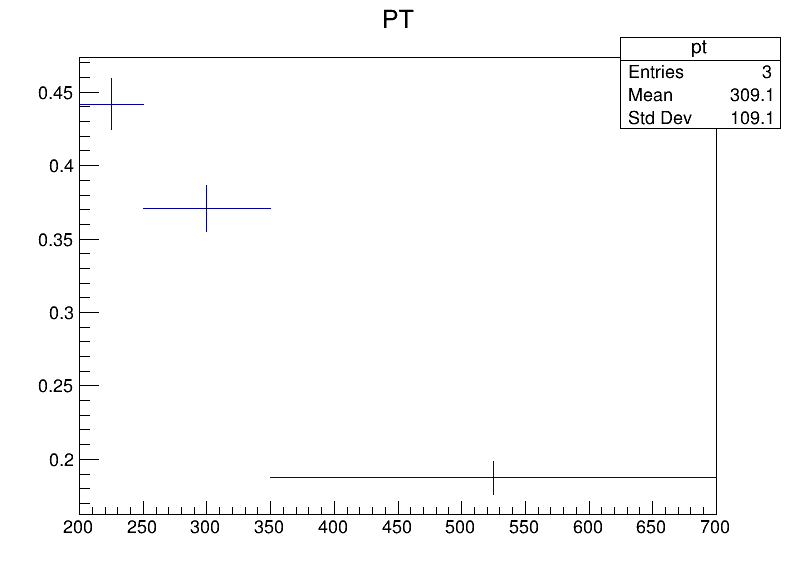

In [23]:
hist.Draw()
canvas.Draw()